C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\hp\anaconda3\lib\site-packages\numpy\

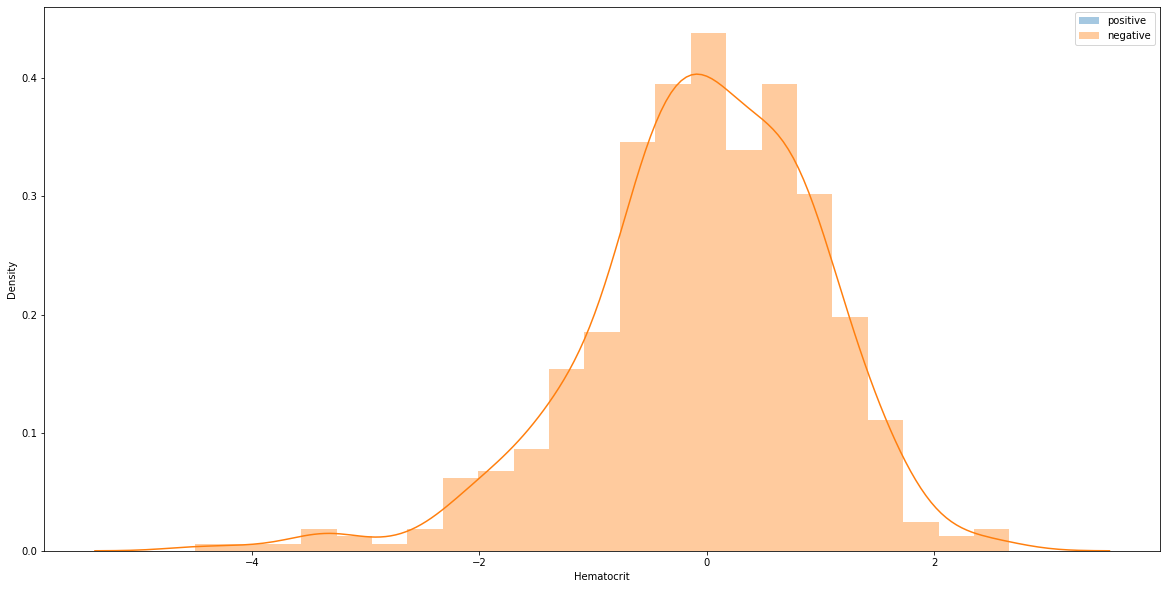

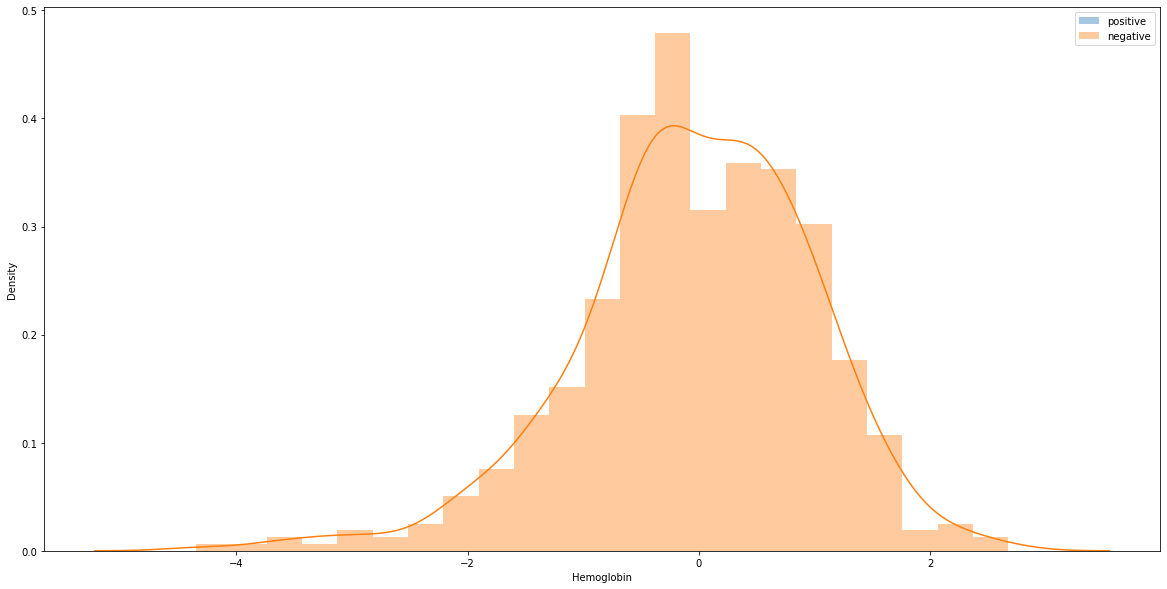

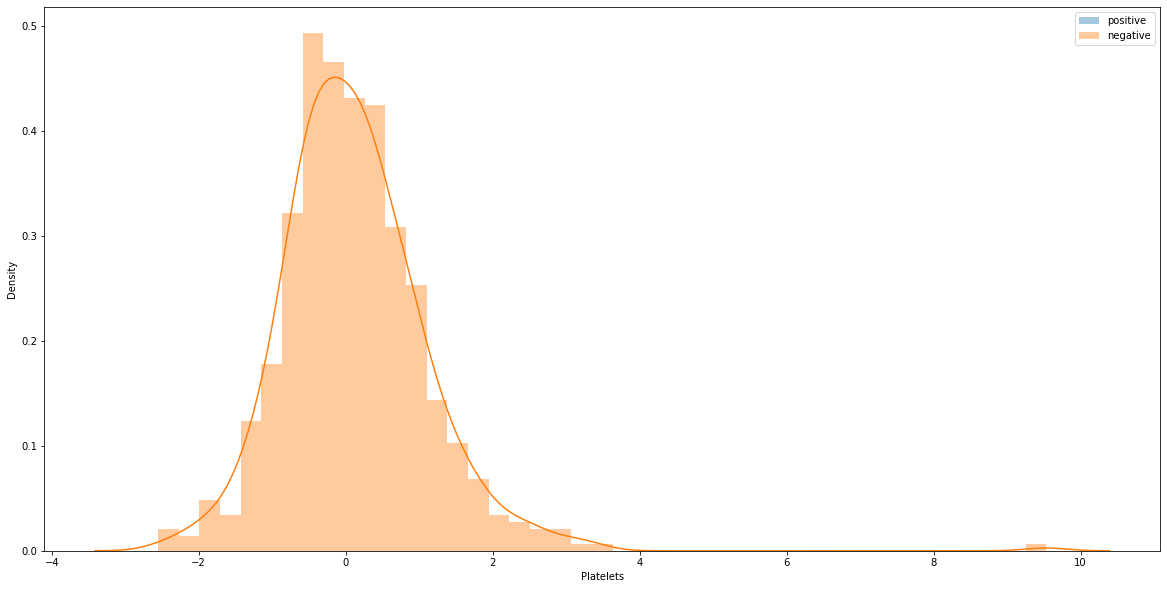

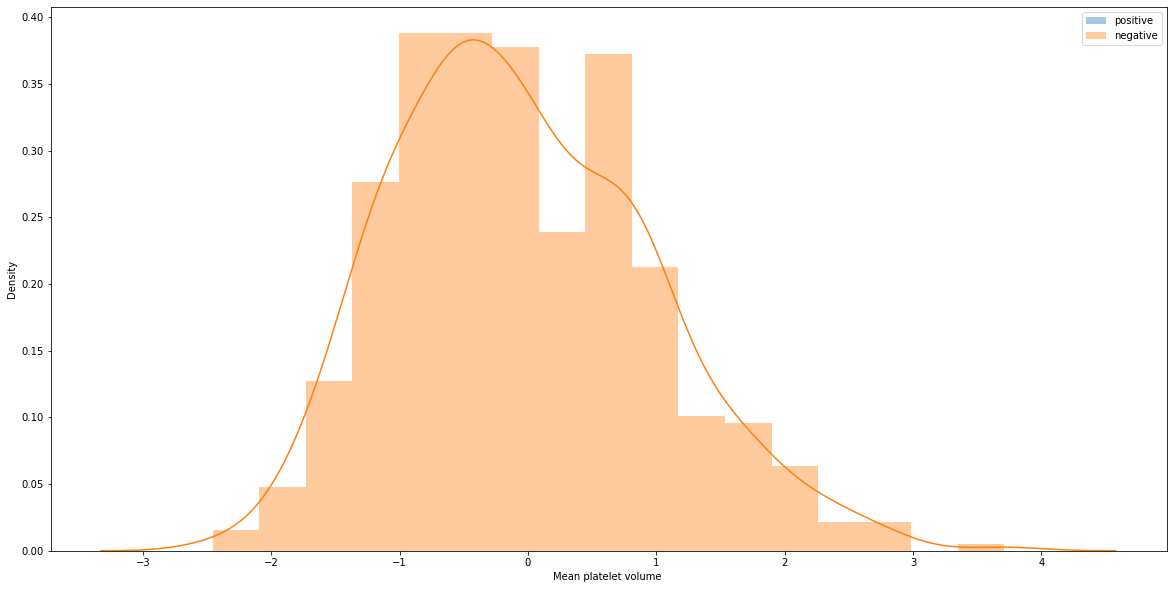

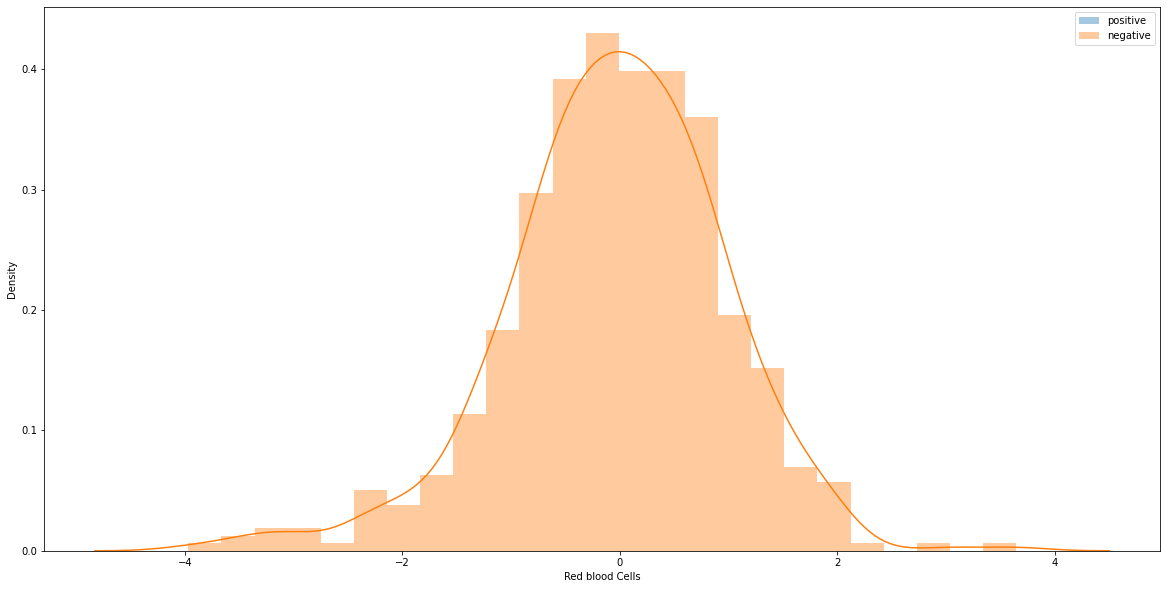

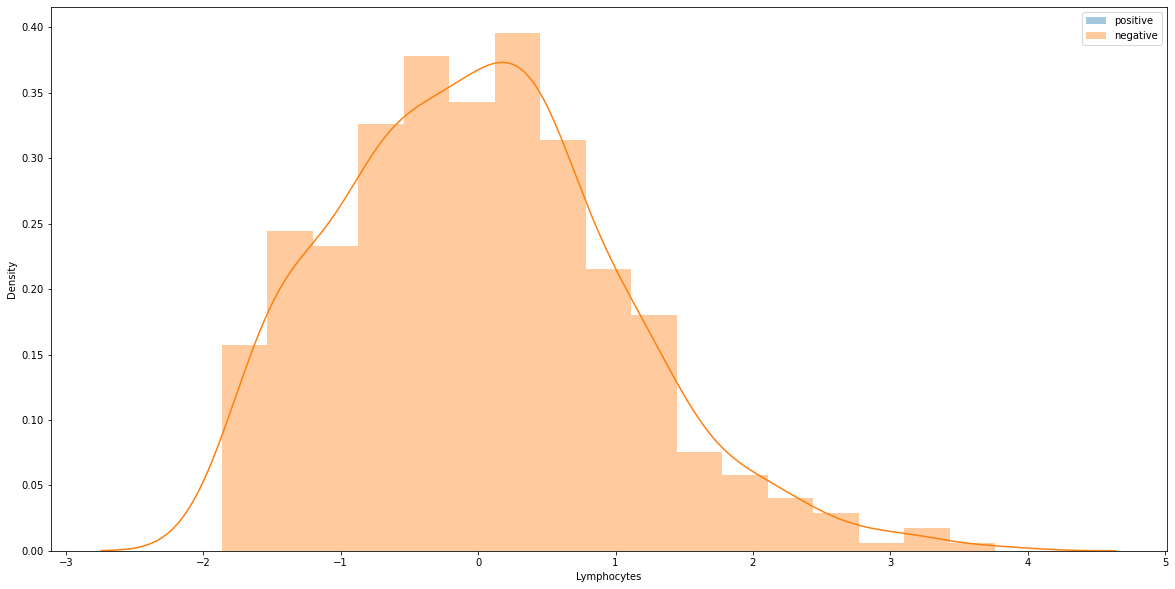

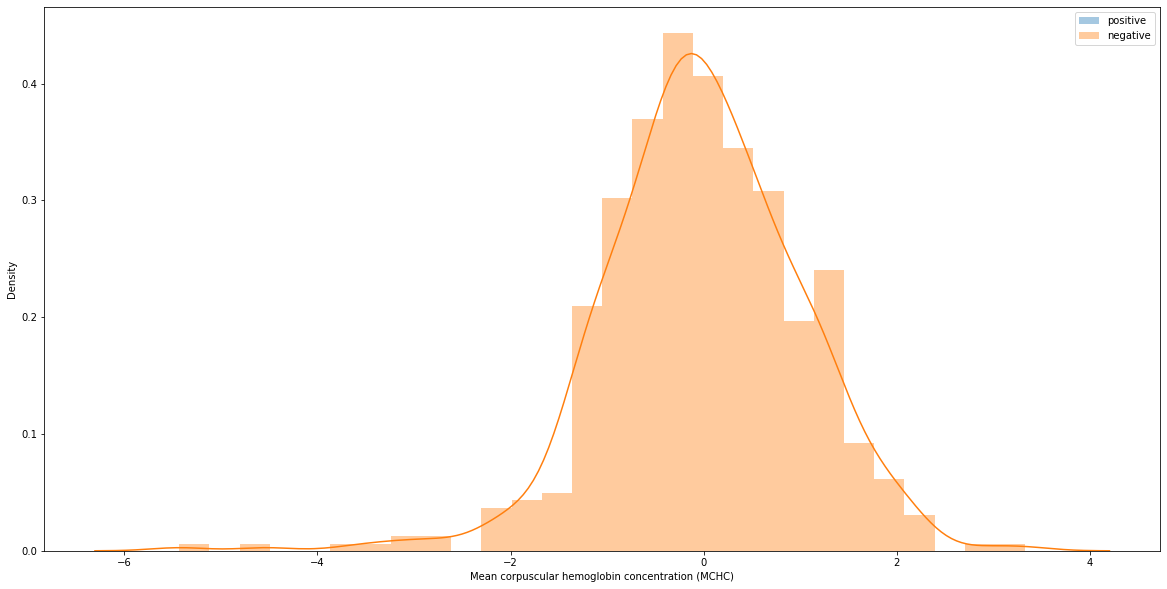

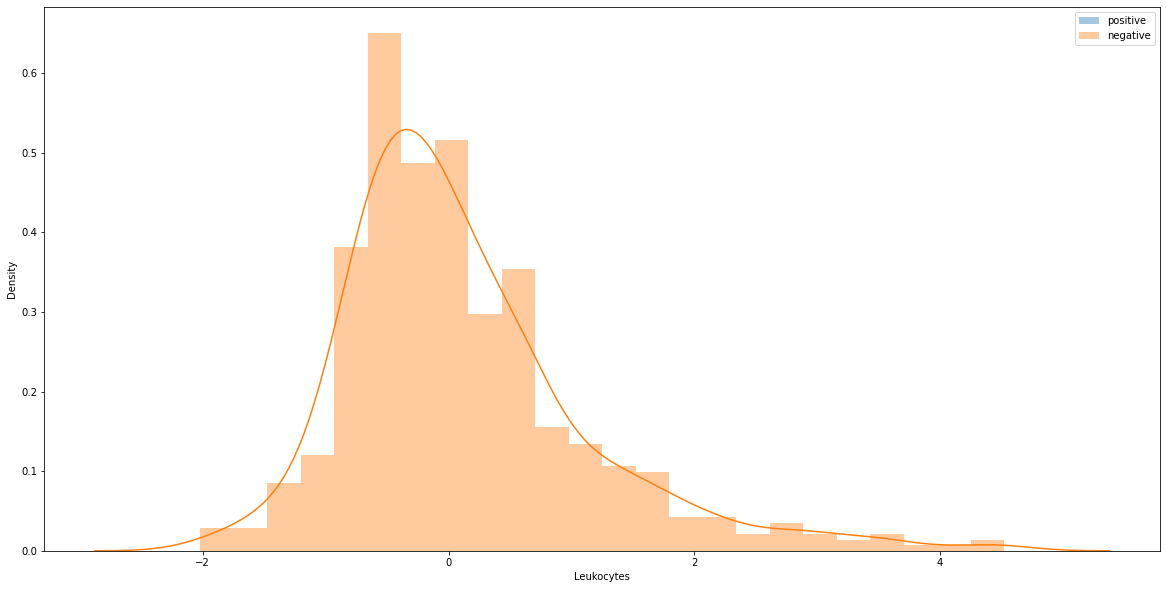

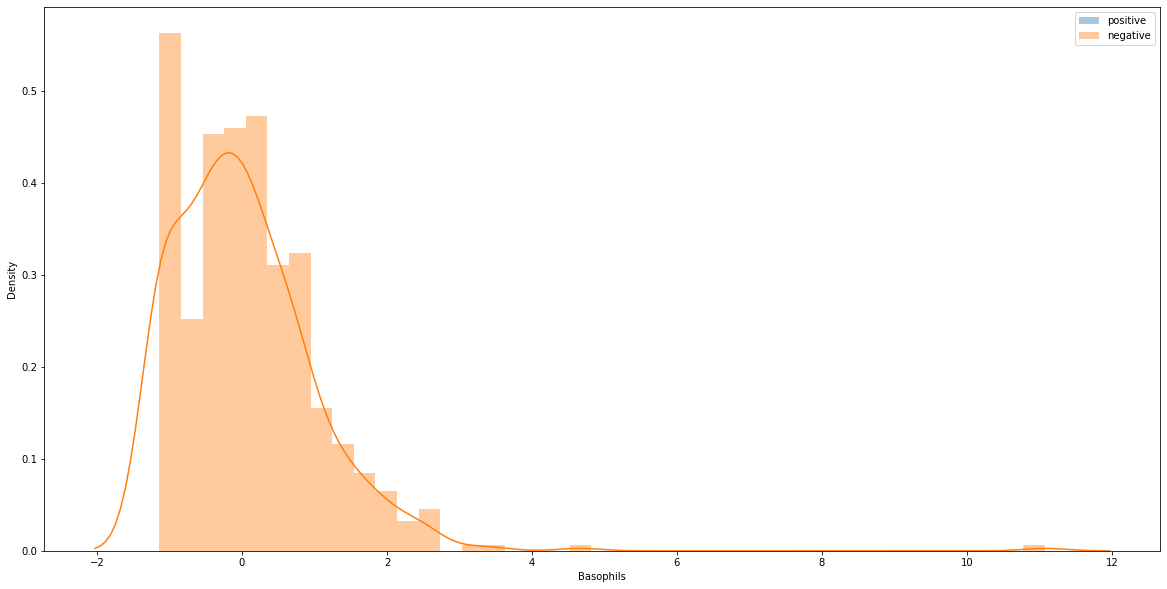

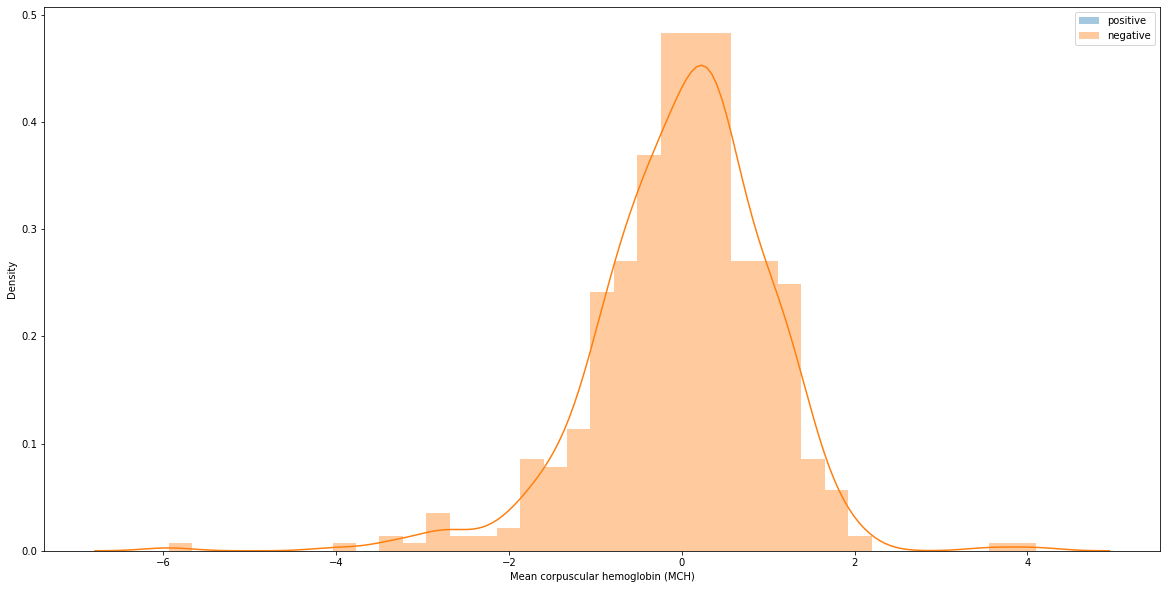

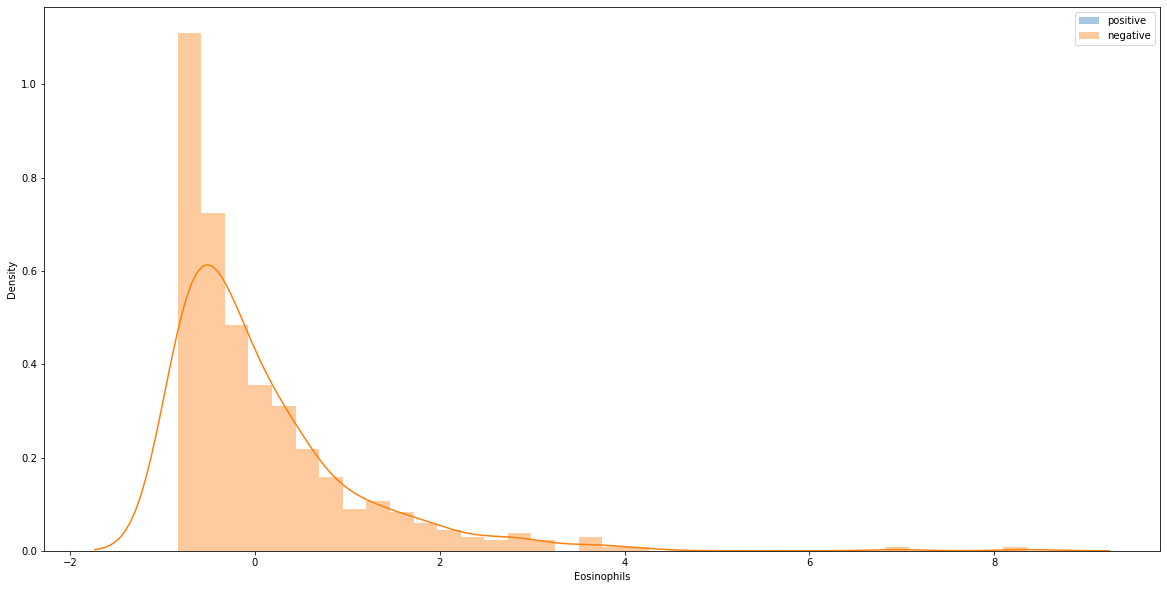

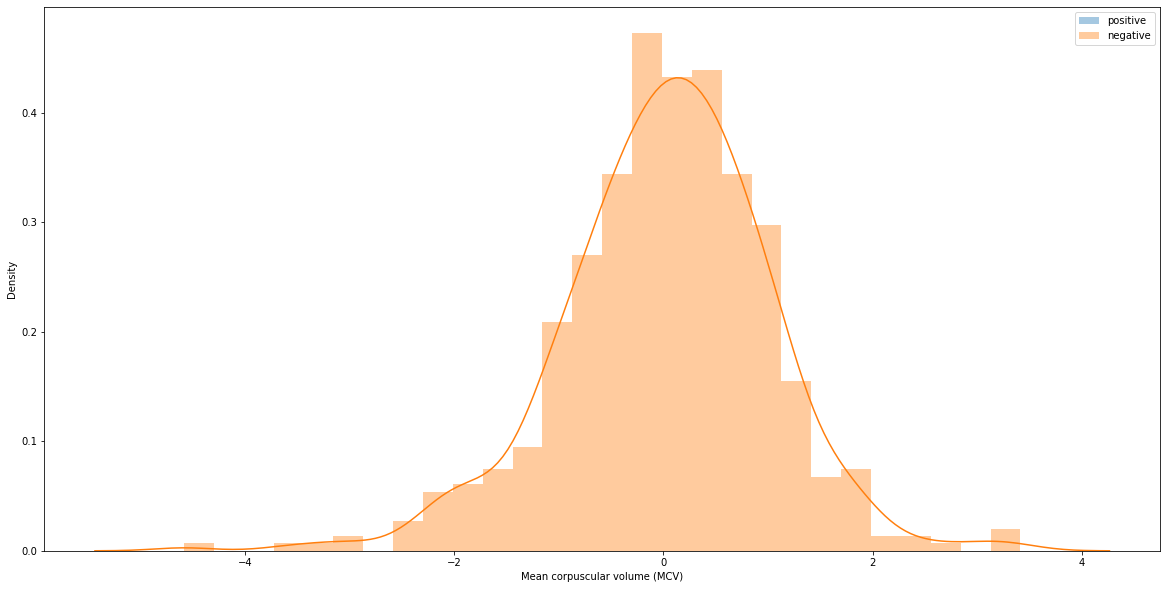

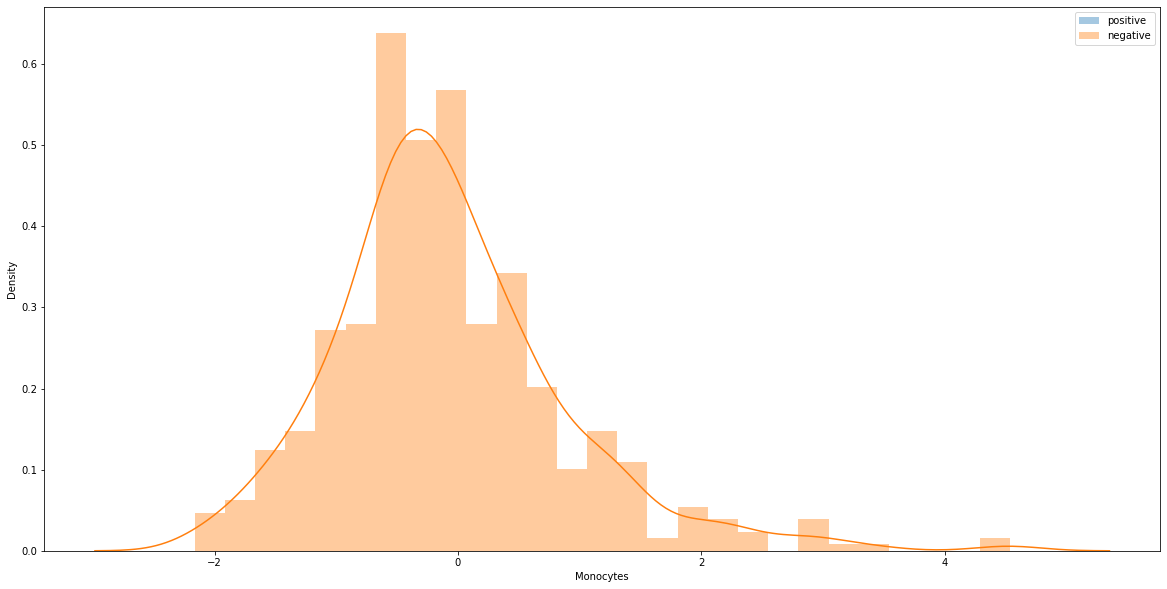

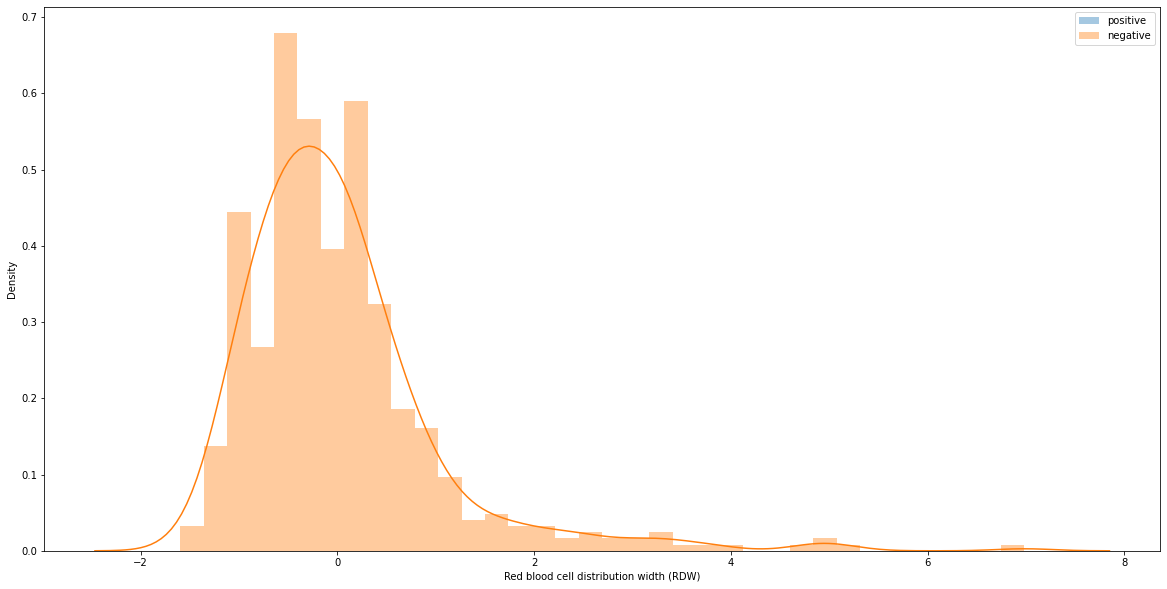

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_excel(r'C:\Users\hp\Desktop\python\datasets\archive3\dataset.xlsx')

df = dataset.copy()
dataset.head()
# savoir le nombre de lignes et de colonnes 
df.shape

# savoir le type des variables df.dtypes.value_counts()

# visualiser les donnees manquantes en meme temps visualiser les donnees un peu liées
# plt.figure(figsize=(20,10))
# sns.heatmap(df.isna(), cbar=False)

# o va faire l'ordre des donnees manquantes

(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

# on doit éliminer les donnees manquantes avec un pourcentage supérieur ou égal à 90%

df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]


# on voit que l'ID patirnt n'a aucun signification donc on peut le supprime

df = df.drop('Patient ID', axis=1)

# Analyse de fond 
# visualiser notre target SARS-Cov-2 exam result

df['SARS-Cov-2 exam result'].value_counts(normalize =True)

# analyse les varibles qualitatves

# for col in df.select_dtypes('object'):
    
#     print(f'{col :-<50}{df[col].unique()}')
    
# on va créer deux sous-ensembles les positives et les négatives

positive_df = df[df['SARS-Cov-2 exam result']== 'posistive']
negative_df = df[df['SARS-Cov-2 exam result']== 'negative']

missing_rate = df.isna().sum()/df.shape[0]

blood_columns = df.columns[(missing_rate <0.9) & (missing_rate >0.88 )]

viral_columns = df.columns[(missing_rate <0.88) & (missing_rate >0.75 )]

for col in blood_columns :
    plt.figure(figsize=(20,10))
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()



In [6]:
# regarde la relation entre le covid et la maladie Influenza
pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


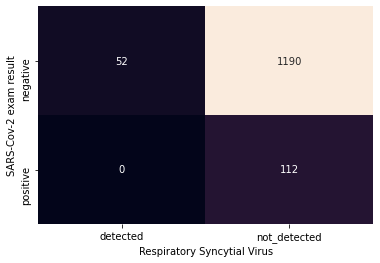

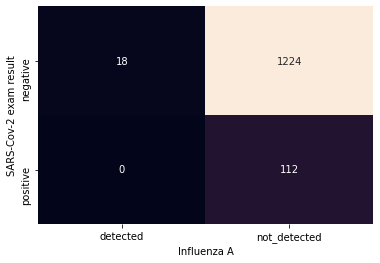

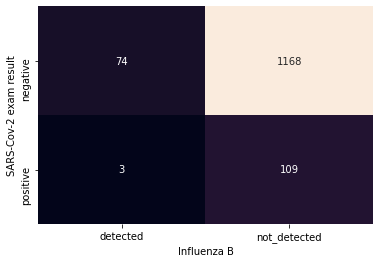

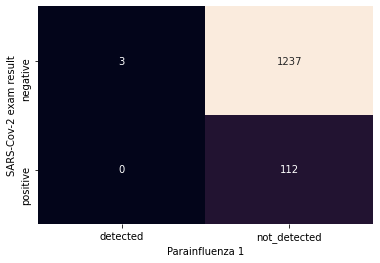

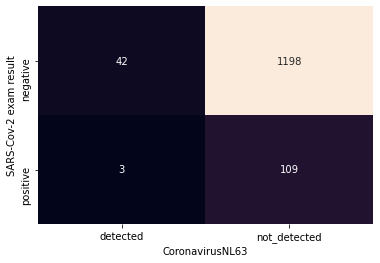

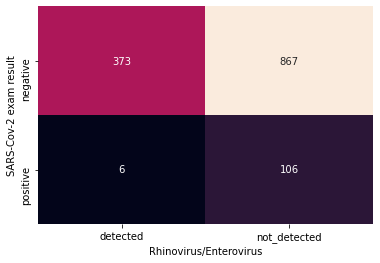

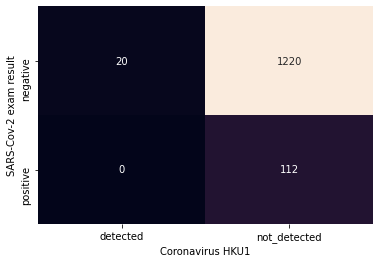

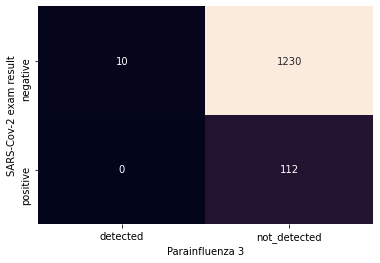

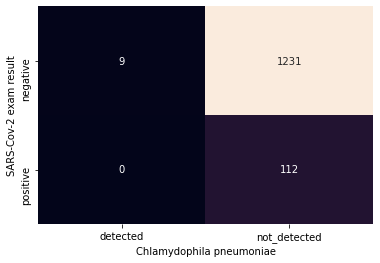

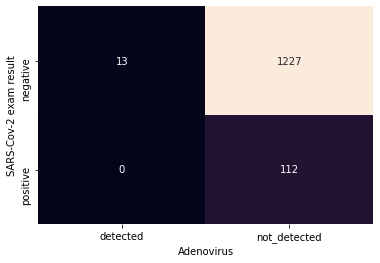

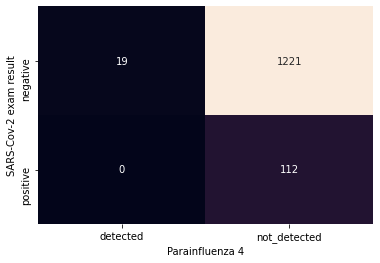

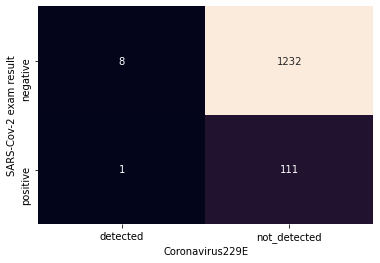

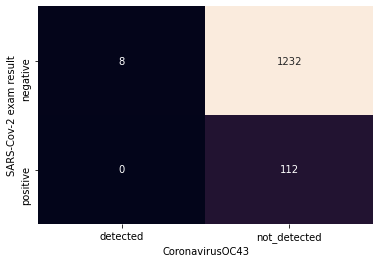

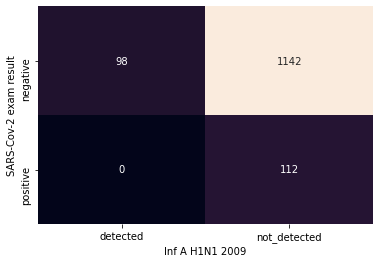

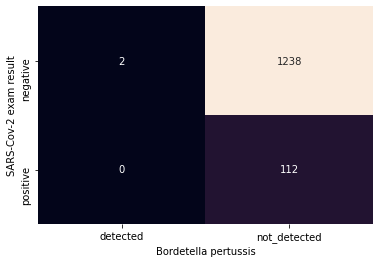

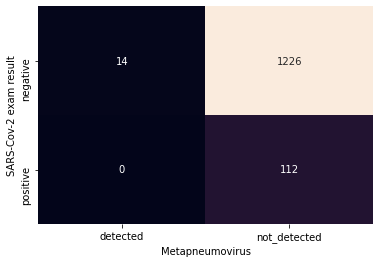

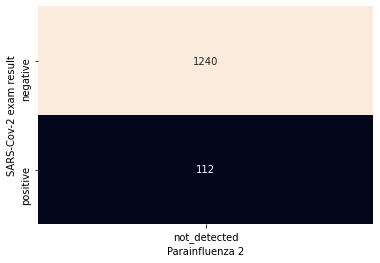

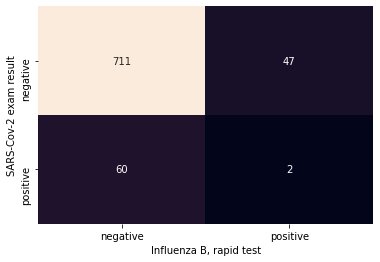

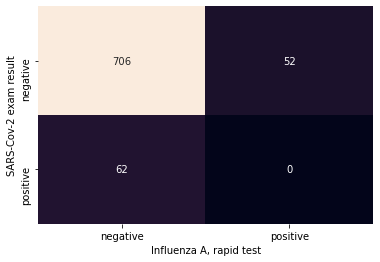

In [7]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d',cbar=False)

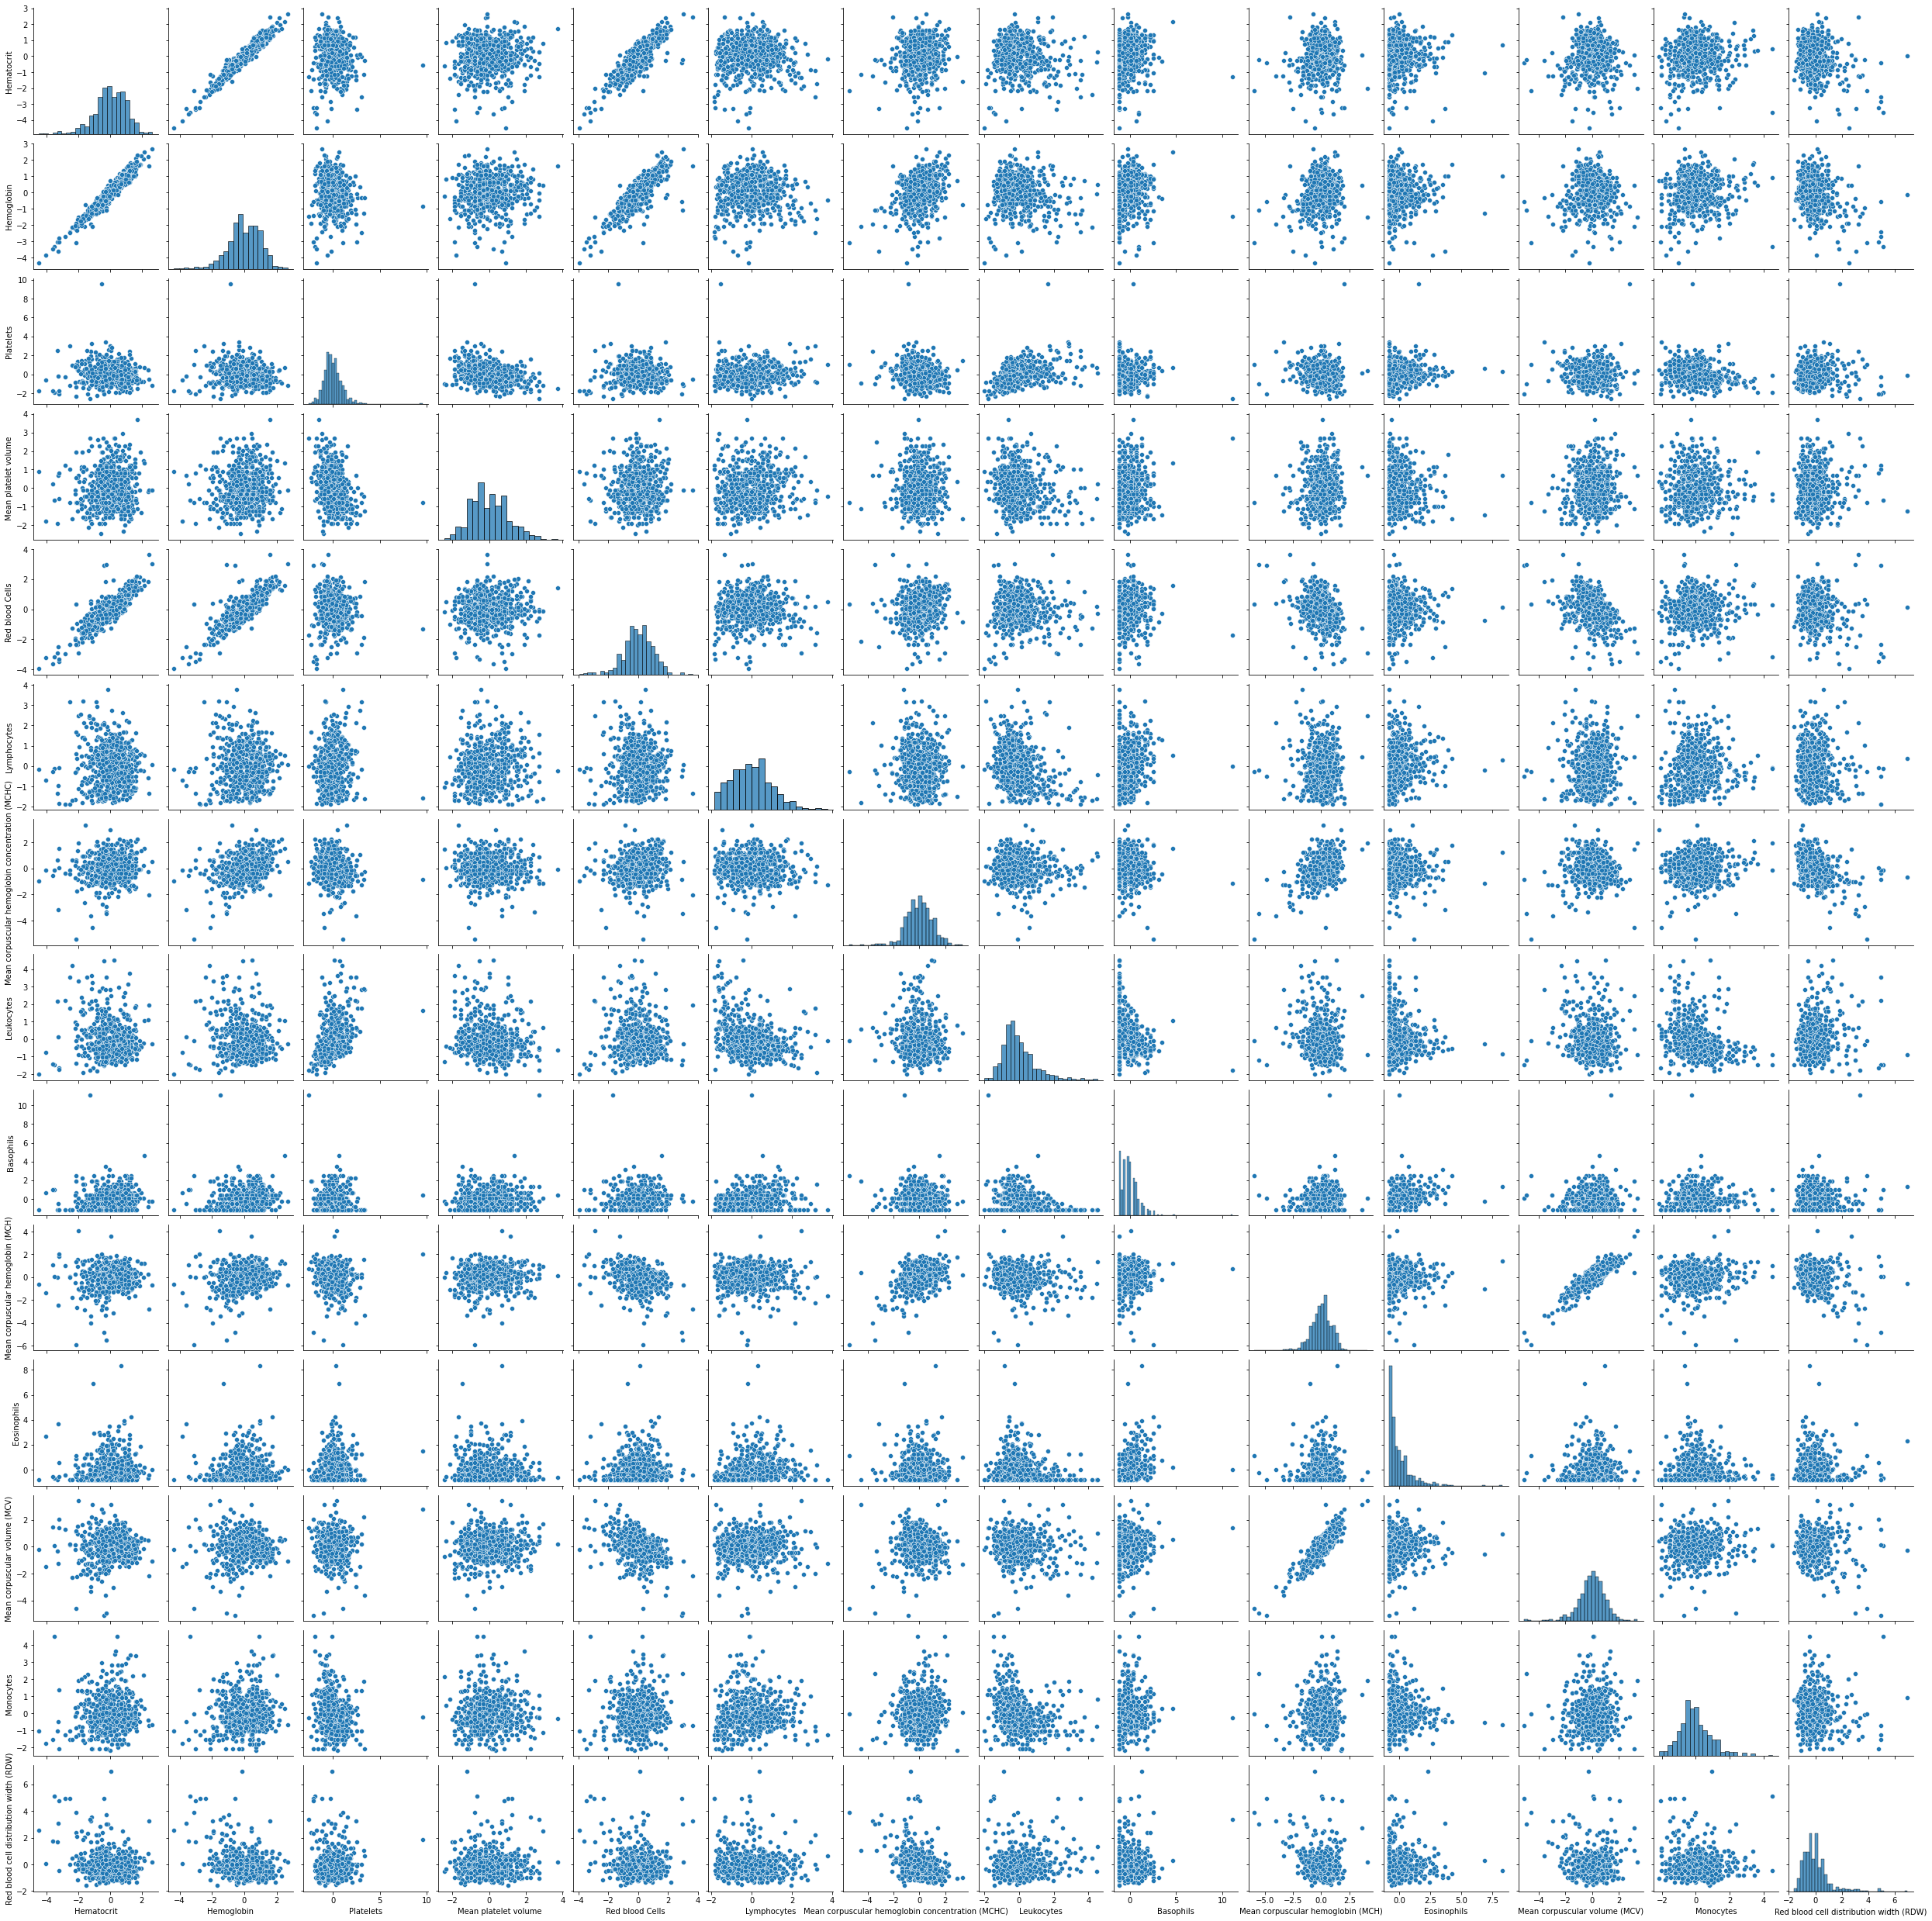

In [8]:
# reltion entre variables

sns.pairplot(df[blood_columns])

<ipython-input-9-59fc838854ff>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

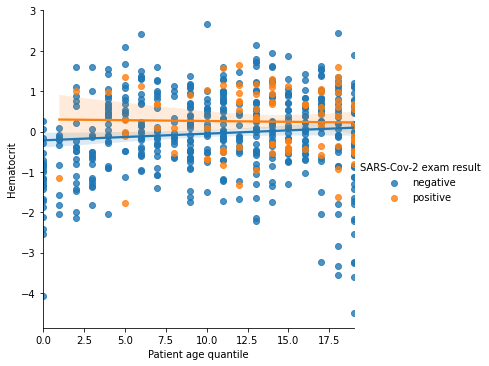

<Figure size 432x288 with 0 Axes>

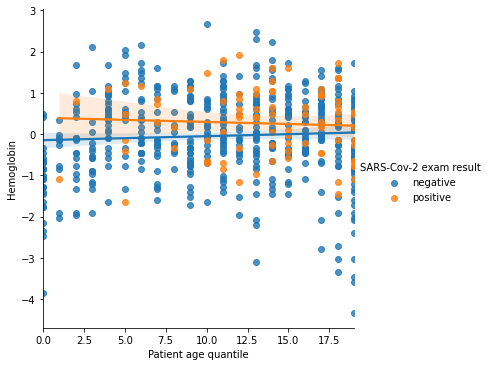

<Figure size 432x288 with 0 Axes>

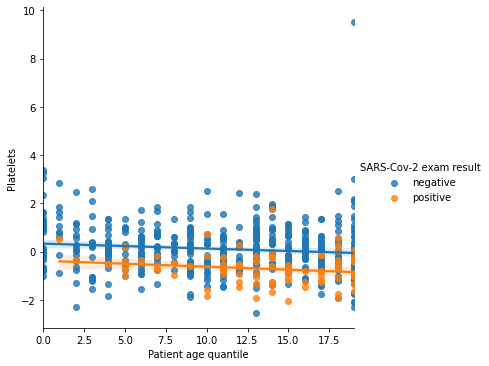

<Figure size 432x288 with 0 Axes>

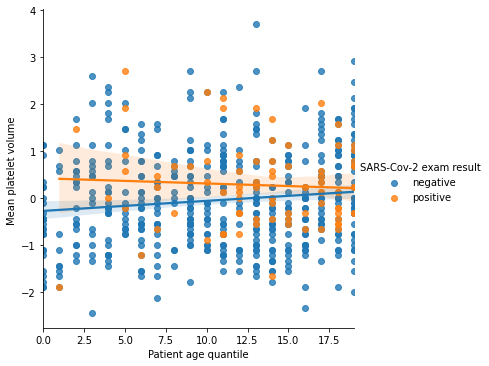

<Figure size 432x288 with 0 Axes>

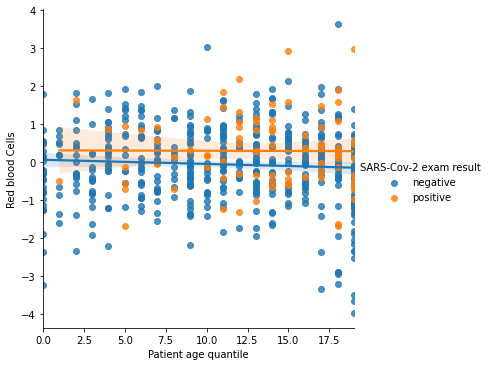

<Figure size 432x288 with 0 Axes>

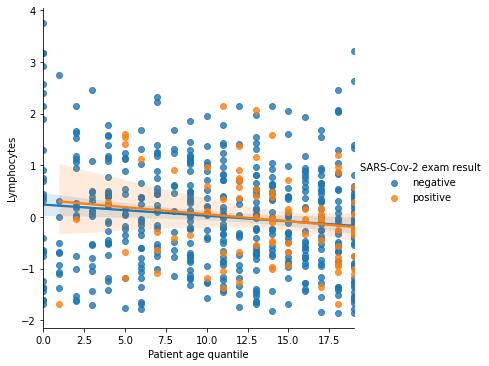

<Figure size 432x288 with 0 Axes>

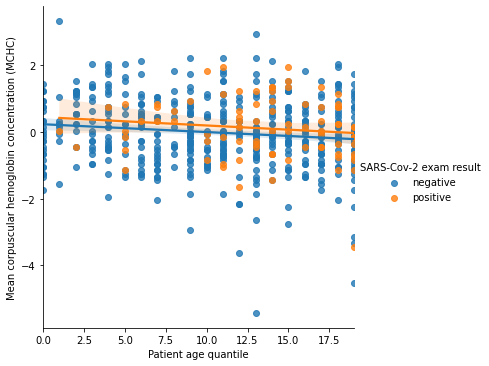

<Figure size 432x288 with 0 Axes>

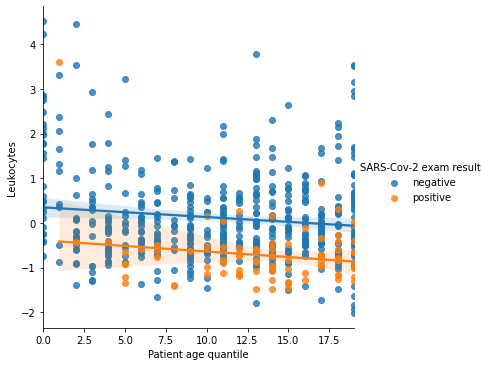

<Figure size 432x288 with 0 Axes>

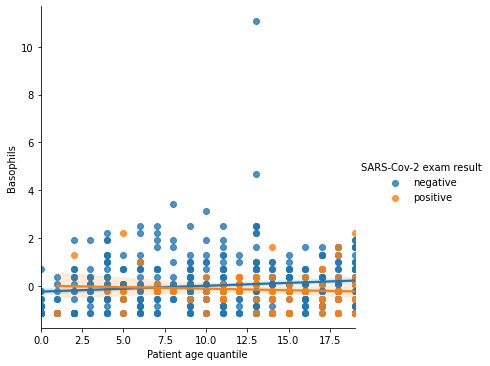

<Figure size 432x288 with 0 Axes>

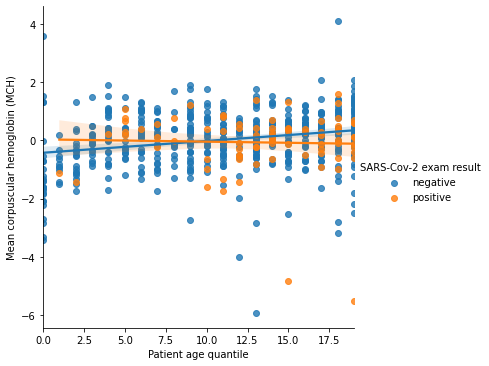

<Figure size 432x288 with 0 Axes>

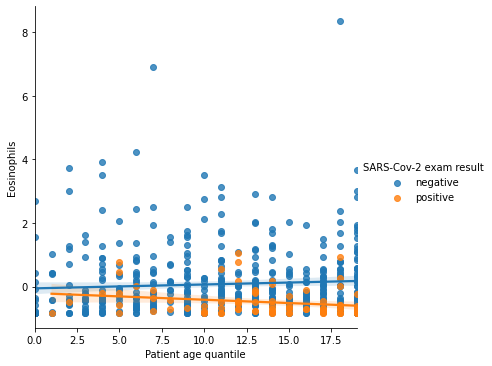

<Figure size 432x288 with 0 Axes>

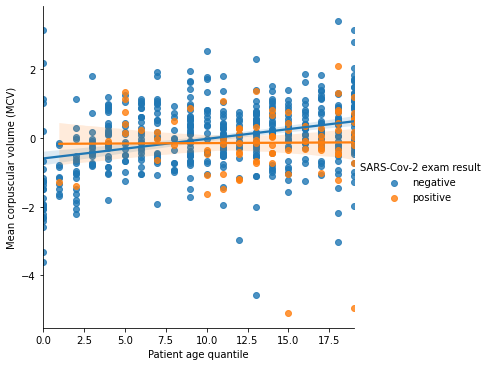

<Figure size 432x288 with 0 Axes>

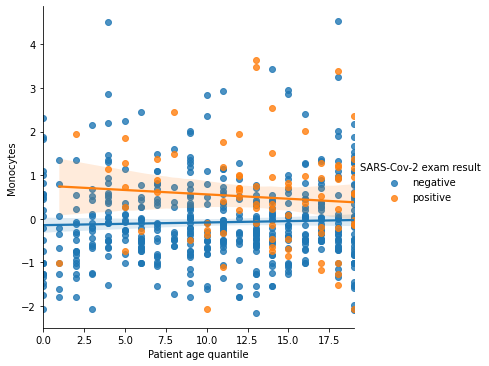

<Figure size 432x288 with 0 Axes>

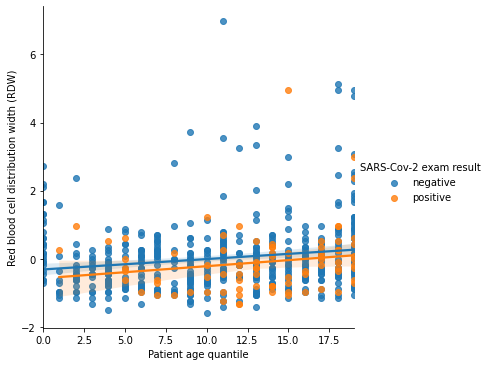

In [9]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

# correlation entre age et blood_data

In [10]:
df.corr().sort_values
# on voit qu'on a une faible correlation entre age et le taux sanguin

<bound method DataFrame.sort_values of                                                     Patient age quantile  \
Patient age quantile                                            1.000000   
Patient addmited to regular ward (1=yes, 0=no)                  0.046166   
Patient addmited to semi-intensive unit (1=yes,...              0.015736   
Patient addmited to intensive care unit (1=yes,...             -0.035772   
Hematocrit                                                      0.096808   
Hemoglobin                                                      0.060320   
Platelets                                                      -0.158683   
Mean platelet volume                                            0.119449   
Red blood Cells                                                -0.037510   
Lymphocytes                                                    -0.125935   
Mean corpuscular hemoglobin concentration (MCHC)               -0.124671   
Leukocytes                                       

# Preprocessing

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_excel(r'C:\Users\hp\Desktop\python\datasets\archive3\dataset.xlsx')
df = dataset.copy()


missing_rate = df.isna().sum()/df.shape[0]

blood_columns = list(df.columns[(missing_rate <0.9) & (missing_rate >0.88 )])

viral_columns = list(df.columns[(missing_rate <0.88) & (missing_rate >0.75 )])

key_columns = ['Patient age quantile','SARS-Cov-2 exam result']

df = df[key_columns + blood_columns + viral_columns]

trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

trainset['SARS-Cov-2 exam result'].value_counts()
testset['SARS-Cov-2 exam result'].value_counts()


negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

# Encodage (les variables qualitatives)

In [12]:

#remplacer les donnees qualutatives par des 0 ou 1

# creer une fonction pour l'encodage 
def encodage (df):
    code = {
    'positive':1,
    'negative':0,
    'detected':1,
    'not_detected':0
     }
    for col in df.select_dtypes('object'):
           df.loc[:,col] = df[col].map(code)
    return df

In [13]:
# l'iputation suppression des donnees manquantes

def imputation (df):
    return df.dropna(axis=0)

In [14]:
# preprocessing

def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    
    X= df.drop('SARS-Cov-2 exam result', axis=1)
    Y= df['SARS-Cov-2 exam result']
    print(Y.value_counts())
    return X,Y

X_train, Y_train = preprocessing(trainset)
X_test, Y_test = preprocessing(testset)

0    73
1    10
Name: SARS-Cov-2 exam result, dtype: int64
0    13
1     3
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# Modelisation

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

# Procédure d'évaluation

[[11  2]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.50      0.67      0.57         3

    accuracy                           0.81        16
   macro avg       0.71      0.76      0.73        16
weighted avg       0.84      0.81      0.82        16



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


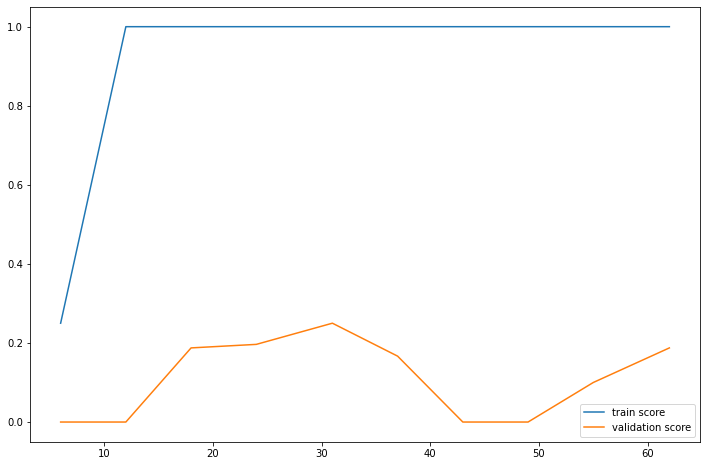

In [16]:
from sklearn.metrics import f1_score, confusion_matrix , classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def evaluation(model):
    model.fit(X_train, Y_train)
    ypred=model.predict(X_test)
    
    print(confusion_matrix(Y_test,ypred))
    print(classification_report(Y_test, ypred))
    
    N, train_score, val_score = learning_curve(model,X_train,Y_train,
                                              cv=4,scoring='f1',
                                              train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    
    plt.plot(N,train_score.mean(axis=1), label='train score')
    plt.plot(N,val_score.mean(axis=1), label='validation score')
    
    plt.legend()
    
evaluation(model)

# on regarde les variables les plus importantes

<AxesSubplot:>

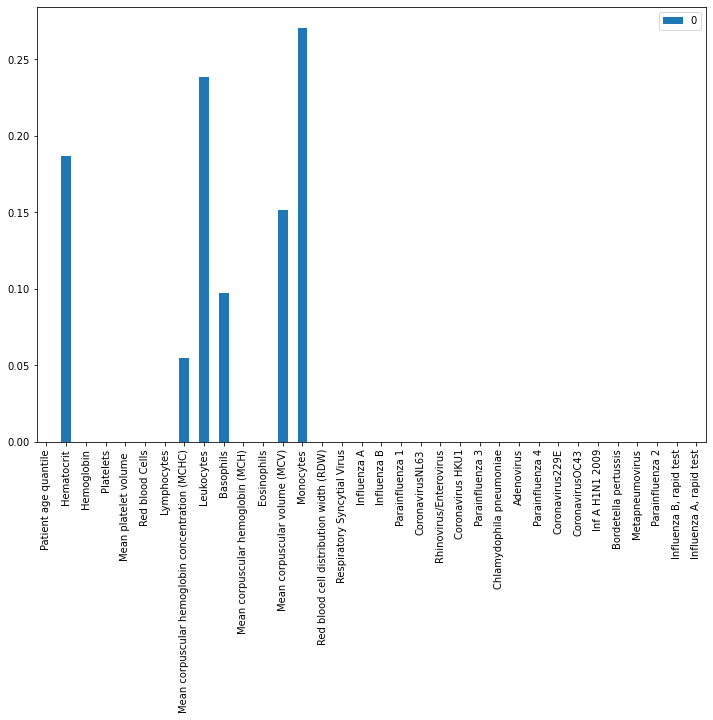

In [47]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

# Modellisation

In [1]:
from sklearn.tree import DecisionTreeClassifer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler



preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=10))

RandomForest = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler() ,SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler() ,KNeighborsClassifier())

#liste de model
#list_of_models = [RandomForest,AdaBoost,SVM,KNN]
dict_of_model={
    'RandomForest':RandomForest,
    'AdaBoost':AdaBoost,
    'SVM':SVM,
    'KNN':KNN
}

for name, model in dict_of_model.items():
    print(name)
    evaluation(model)

ImportError: cannot import name 'DecisionTreeClassifer' from 'sklearn.tree' (C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\__init__.py)

## Optimisation

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  classification_report

hyper_params = {'svc__gamma':[1e-3,1e-4],'svc__C':[1,10,100,1000]}

grid = GridSearchCV(SVM,hyper_params,scoring='recall',cv=4)

grid.fit(X_train,Y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(Y_test,y_pred))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  19  21  22  23  24  25  29  31  49  50  52  53  55  56  57  58
  59  63  65  83  85  86  88  89  90  91  92  96  98 115 117 118 120 121
 122 123 124 128 130 146 148 149 151 152 153 154 155 159 161 176 178 179
 181 182 183 184 185 189 191 205 207 208 210 211 212 213 214 218 220 233
 235 236 238 239 240 241 242 246 248 260 262 263 265 266 267 268 269 273
 275 286 288 289 291 292 293 294 295 299 301 311 313 314 316 317 318 319
 320 324 326 335 337 338 340 341 342 343 344 348 350 358 360 361 363 364
 365 366 367 371 373 380 382 383 385 386 387 388 389 393 395 401 403 404
 406 407 408 409 410 414 416 421 423 424 426 427 428 429 430 434 436 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 477
 478 480 481 482 483 484 485 486 487 488 490 492 493 494 495 496 497 498
 499 5

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  21  22  23  24  25  29  31  33  49  50  52  55  56  57  58  59
  63  65  67  83  85  88  89  90  91  92  96  98 100 115 117 120 121 122
 123 124 128 130 132 146 148 151 152 153 154 155 159 161 163 176 178 181
 182 183 184 185 189 191 193 205 207 210 211 212 213 214 218 220 222 233
 235 238 239 240 241 242 246 248 250 260 262 265 266 267 268 269 273 275
 277 286 288 291 292 293 294 295 299 301 303 311 313 316 317 318 319 320
 324 326 328 335 337 340 341 342 343 344 348 350 352 358 360 363 364 365
 366 367 371 373 375 380 382 385 386 387 388 389 393 395 397 401 403 406
 407 408 409 410 414 416 418 421 423 426 427 428 429 430 434 436 438 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 477
 478 480 481 482 483 484 485 486 487 488 490 492 493 494 495 496 497 498
 499 5

{'svc__C': 1000, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.00      0.00      0.00         3

    accuracy                           0.75        16
   macro avg       0.40      0.46      0.43        16
weighted avg       0.65      0.75      0.70        16



C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  21  22  23  24  25  29  31  33  49  50  52  55  56  57  58  59
  63  65  67  83  85  88  89  90  91  92  96  98 100 115 117 120 121 122
 123 124 128 130 132 146 148 151 152 153 154 155 159 161 163 176 178 181
 182 183 184 185 189 191 193 205 207 210 211 212 213 214 218 220 222 233
 235 238 239 240 241 242 246 248 250 260 262 265 266 267 268 269 273 275
 277 286 288 291 292 293 294 295 299 301 303 311 313 316 317 318 319 320
 324 326 328 335 337 340 341 342 343 344 348 350 352 358 360 363 364 365
 366 367 371 373 375 380 382 385 386 387 388 389 393 395 397 401 403 406
 407 408 409 410 414 416 418 421 423 426 427 428 429 430 434 436 438 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 477
 478 480 481 482 483 484 485 486 487 488 490 492 493 494 495 496 497 498
 499 5